In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

# Inicialización

El primer paso que vamos a realizar es cargar las dos tablas en dos data frames. 

In [2]:
df_volvera = pd.read_csv("tp-2020-2c-train-cols1.csv")
df_volvera

,id_usuario,volveria
0,117,0
1,658,0
2,794,0
3,455,0
4,173,1
...,...,...
796,448,1
797,636,1
798,848,0
799,304,1


In [3]:
df_usuario = pd.read_csv("tp-2020-2c-train-cols2.csv")
df_usuario

,tipo_de_sala,nombre,id_usuario,genero,edad,amigos,parientes,id_ticket,precio_ticket,fila,nombre_sede
0,4d,Señor Camilo Pedro,117,hombre,73.5,0,0,59258;,1,NaN,fiumark_quilmes
1,4d,Señora Raquel Angelica,658,mujer,35.0,1,1,586:6;,2,NaN,fiumark_quilmes
2,normal,Señor Antonio Federico,794,hombre,NaN,0,0,"RE""39822",3,NaN,fiumark_chacarita
3,4d,Señor Osvaldo Aureliano,455,hombre,NaN,0,0,"C17""4:39",1,NaN,fiumark_palermo
4,4d,Señorita Rita Eudosia,173,mujer,4.0,1,1,569964,2,NaN,fiumark_palermo
...,...,...,...,...,...,...,...,...,...,...,...
796,normal,Señor Bernardo Melesio,448,hombre,37.0,0,0,3359;6,3,NaN,fiumark_palermo
797,3d,Señorita Lidia Catalina,636,mujer,31.0,0,0,45988:,2,NaN,fiumark_palermo
798,4d,Señor Arturo Antenor,848,hombre,38.0,0,0,56;435,1,NaN,fiumark_chacarita
799,3d,Señorita Natividad Sofia,304,mujer,NaN,0,0,4487;5,2,adelante,fiumark_quilmes


En un primer analisis, podemos ver de ambas tablas poseen un total de 801 filas, teniendo ambas tablas igual cantidad de valores. 

Para hacer un join de las mismas, vamos a utilizar el campo `id_usuario` el cual es compartido.

Dejaremos en la variable `df_joined` las tablas unidas sin modificar, y usaremos `df` para ir realizando operaciones sobre la misma.

In [4]:
df_joined = df_usuario.join(df_volvera.set_index('id_usuario'), on='id_usuario', how='inner').set_index('id_usuario')
df = df_joined.copy()

# Analisis de Datos

## Columnas con información duplicada

En este paso vamos a tratar de averiguar si tenemos información duplicada. El siguiente comando nos mostrara si existen respuestas exactamente iguales en la encuesta.

In [5]:
df[df.duplicated(keep=False)]

,tipo_de_sala,nombre,genero,edad,amigos,parientes,id_ticket,precio_ticket,fila,nombre_sede,volveria
id_usuario,,,,,,,,,,,


Lo bueno de la verifcación anterior es que sabemos que no existio multiples respuestas exactamente iguales.

## Columnas con ausencia de información

El objetivo de este analisis es poder entender cuales son las columnas que poseen faltante de información.

In [6]:
simbols = ["-","","_"]
for c in simbols:
    print("Column has simbol: '",c,"'")
    print(df.astype('str').eq(c).any())

Column has simbol: ' - '
tipo_de_sala     False
nombre           False
genero           False
edad             False
amigos           False
parientes        False
id_ticket        False
precio_ticket    False
fila             False
nombre_sede      False
volveria         False
dtype: bool
Column has simbol: '  '
tipo_de_sala     False
nombre           False
genero           False
edad             False
amigos           False
parientes        False
id_ticket        False
precio_ticket    False
fila             False
nombre_sede      False
volveria         False
dtype: bool
Column has simbol: ' _ '
tipo_de_sala     False
nombre           False
genero           False
edad             False
amigos           False
parientes        False
id_ticket        False
precio_ticket    False
fila             False
nombre_sede      False
volveria         False
dtype: bool


Viendo el resultado anterior, sabemos que no existen caracteres especiales que puedan representar la ausencia de valor distinto a NaN.

A continuación, analizaremos las tablas con valores númericos. En la columna `edad` deberemos considerar como invalido cualquier valor menor o igual a cero. En las otras columnas `amigos` `parientes` `precio_ticket` `volveria` un valor menor a cero sería invalido.

In [7]:
(df['edad'] <= 0).any()

False

In [8]:
columnas_con_numeros = ['amigos', 'parientes', 'precio_ticket', 'volveria']
(df[columnas_con_numeros] < 0).any()

amigos           False
parientes        False
precio_ticket    False
volveria         False
dtype: bool

Por lo visto de analisar la información, no tenemos casos extraños de respuestas que requieran de un analisis especial. Aun sin embargo, nos queda la verificación mas importante que es la de valores en `null`.

In [9]:
df.isnull().sum()

tipo_de_sala       0
nombre             0
genero             0
edad             160
amigos             0
parientes          0
id_ticket          0
precio_ticket      0
fila             624
nombre_sede        2
volveria           0
dtype: int64

Como podemos ver de este ultimo comando, la columna `fila` posee unos 624 nulls de los 801 valores. Adicionalmente, la segunda columna con poca información es la columna edad. A continuación calcularemos el porcentaje de que ausencia de valor de dichas columnas.

In [10]:
(df.isnull().mean()*100).to_frame('porcentaje nulls')

,porcentaje nulls
tipo_de_sala,0.000000
nombre,0.000000
genero,0.000000
edad,19.975031
amigos,0.000000
parientes,0.000000
id_ticket,0.000000
precio_ticket,0.000000
fila,77.902622
nombre_sede,0.249688


Viendo estos valores, podemos observar que en la columna `fila` que representa la fila donde se sento el cliente al ver la pelicula tiene un 78% de ausencia de información. En cuanto a la columna `edad`, encontramos un 20% de faltante de información. 

Es importante mencionar tambien que la columna `nombre_sede` tiene algunos valores en null por lo que deberemos tomar una decisión de que hacer con dichas entradas.

## Analisis de la columna "Fila"

La función `porcentajeVolveria` nos servira para poder obtener los porcentajes que volverian basados en un agrupamiento.

In [11]:
def porcentajeVolveria(group):
    return (group == 1).mean() * 100.0

In [12]:
volveria_por_fila = df.groupby(by='fila').agg({
        "volveria" : porcentajeVolveria,       
})
volveria_por_fila

,volveria
fila,
adelante,68.902439
medio,53.846154


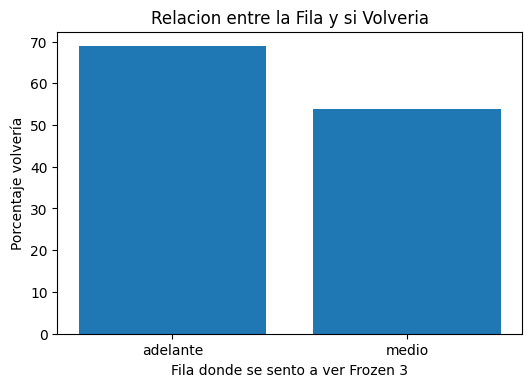

In [13]:
plt.figure(dpi=(100))
plt.ylabel("Porcentaje volvería")
plt.xlabel("Fila donde se sento a ver Frozen 3")
plt.title('Relacion entre la Fila y si Volveria')
plt.bar(volveria_por_fila.index, volveria_por_fila['volveria'])
plt.show()

Como podemos observar, los valores porcentuales de si volvería según el tipo de fila son bastantes similares, lo que no nos muestra un patron que nos pueda servir en nuestro analisis.

Adicionalmente, dado que no podemos inferir un tipo de valor para reemplazar todas la ausencia de valores en cada respuesta, podemos proceder a descartar dicha información y no utilizarla en nuestros analisis.

In [14]:
df.drop(columns=['fila'])

,tipo_de_sala,nombre,genero,edad,amigos,parientes,id_ticket,precio_ticket,nombre_sede,volveria
id_usuario,,,,,,,,,,
117,4d,Señor Camilo Pedro,hombre,73.5,0,0,59258;,1,fiumark_quilmes,0
658,4d,Señora Raquel Angelica,mujer,35.0,1,1,586:6;,2,fiumark_quilmes,0
794,normal,Señor Antonio Federico,hombre,NaN,0,0,"RE""39822",3,fiumark_chacarita,0
455,4d,Señor Osvaldo Aureliano,hombre,NaN,0,0,"C17""4:39",1,fiumark_palermo,0
173,4d,Señorita Rita Eudosia,mujer,4.0,1,1,569964,2,fiumark_palermo,1
...,...,...,...,...,...,...,...,...,...,...
448,normal,Señor Bernardo Melesio,hombre,37.0,0,0,3359;6,3,fiumark_palermo,1
636,3d,Señorita Lidia Catalina,mujer,31.0,0,0,45988:,2,fiumark_palermo,1
848,4d,Señor Arturo Antenor,hombre,38.0,0,0,56;435,1,fiumark_chacarita,0


## Analisis de la columna "Edad"

Reutilizaremos la función definida anteriomente en el analisis de la columna `Fila`

In [15]:
volveria_por_edad = df.groupby(by='edad').agg({
        "volveria" : porcentajeVolveria,       
})
volveria_por_edad

,volveria
edad,
3.42,100.000000
3.67,100.000000
3.75,100.000000
3.83,100.000000
4.00,71.428571
...,...
73.00,0.000000
73.50,0.000000
74.00,0.000000


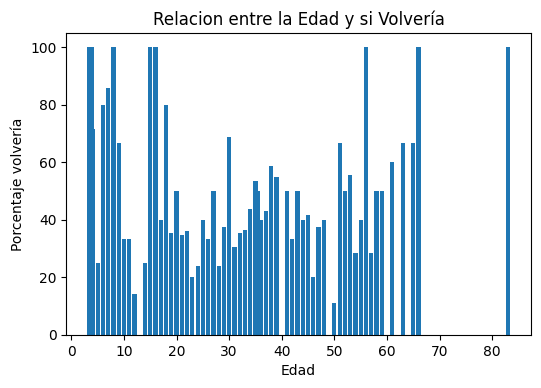

In [16]:
plt.figure(dpi=(100))
plt.ylabel("Porcentaje volvería")
plt.xlabel("Edad")
plt.title('Relacion entre la Edad y si Volvería')
plt.bar(volveria_por_edad.index, volveria_por_edad['volveria'])
plt.show()

Con esta información, rapidamente podemos ver que el porcentaje que volvería no es uniforme según la edad de quienes respondieron la encuesta, lo que nos muestra una posibilidad de una dependencia entre ambas variables.

Sin embargo, esto nos genera el problema de tener que lidiar con las respuestas vacias que se encuentran en dicha columna. Dado que la edad es un valor númerico, una de las opciones sería simplemente autocompletar con el valor medio.

### Anásisis de la columna "Amigos"

nos centraremos en ver si existe alguna influencia con la variable target: "volveria" respecto a si fue con amigos( >= 1 amigo) ó no (0 amigos).

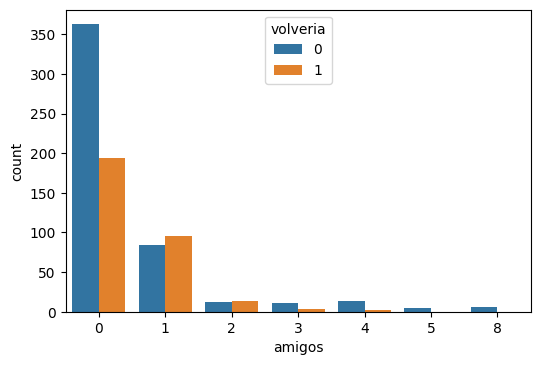

In [24]:
import seaborn as sns

plt.figure(dpi=100)
sns.countplot(data=df, x='amigos', hue='volveria')

plt.show()


podemos observar que la cantidad de personas que **no volveria es importante para cuando la persona va sin amigos**, 
respecto a la cantidad de personas que volverían.

mientras que para las personas que van con 1 amigo ó más, notamos que no hay diferencias marcadas como para tomar una determinación clara sobre si volveria al cine ó no.

### Análisis de la columna "Parientes"

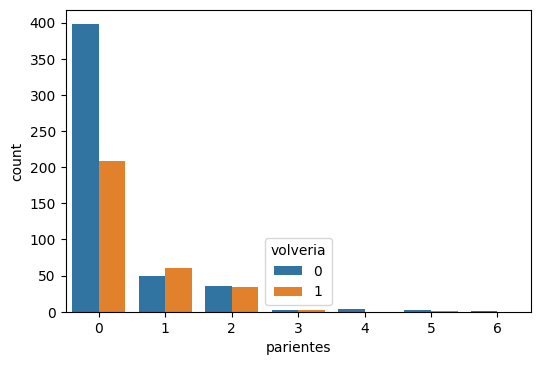

In [25]:
import seaborn as sns

plt.figure(dpi=100)
sns.countplot(data=df, x='parientes', hue='volveria')

plt.show()

podemos observar que la cantidad de personas que **no volveria es importante para cuando la persona va sin parientes**, 
respecto a la cantidad de personas que volverían.

mientras que para las personas que van con 1 pariente ó más, notamos que no hay diferencias marcadas como para tomar una determinación clara sobre si volveria al cine ó no.

### 

In [18]:
df_quilmes = df_usuarioClean.loc[df_usuarioClean.nombre_sede == 'fiumark_quilmes']
df_palermo = df_usuarioClean.loc[df_usuarioClean.nombre_sede == 'fiumark_palermo']
df_chacarita = df_usuarioClean.loc[df_usuarioClean.nombre_sede == 'fiumark_chacarita']
"""
#existen sedes sin nombre, entonces las elimino del data frame original para evitar inconsistencias.
df_usuarioClean.loc[ (df_usuarioClean.nombre_sede != 'fiumark_quilmes') & (df_usuarioClean.nombre_sede != 'fiumark_palermo') & (df_usuarioClean.nombre_sede != 'fiumark_chacarita')]

# al "plotear" el df me salen los nombres de labels principales por id y los borro del df
df_usuarioClean.drop(labels=[830,62], inplace=True)
"""

df_quilmes.loc[df_quilmes.volveria == 1].count() / df_quilmes.count()


NameError: name 'df_usuarioClean' is not defined

In [ ]:
df_palermo.loc[df_palermo.volveria == 1].count() / df_palermo.count()

In [ ]:
df_chacarita.loc[df_chacarita.volveria == 1].count() / df_chacarita.count()

In [ ]:
df_usuarioClean[ ['nombre_sede'] ].value_counts().plot(kind='bar')

In [ ]:
def porcentajeVolveria(unAgrupamiento):
    return (unAgrupamiento == 1).mean() * 100.0

def porcentajeNOVolveria(unAgrupamiento):
    return (unAgrupamiento == 0).mean() * 100.0

df_agrupados_por_sede = df_usuarioClean.groupby(by='nombre_sede').agg(
    {
        "volveria" : porcentajeVolveria,
    }
)

df_agrupados_por_sede

In [ ]:
df_agrupados_por_sede.plot(kind = 'bar')

In [ ]:
df_agrupados_por_sede = df_usuarioClean.groupby('nombre_sede').agg(list)


arrayNumpy = df_agrupados_por_sede.to_numpy()
hola = np.array(arrayNumpy)


hola[0][1]

### Analizo otras variables que se me ocurren: Ir con amigos y/o familiares

In [ ]:
df_usuarioClean.loc[(df_usuarioClean.genero == 'mujer') & (df_usuarioClean.volveria == 0)]

### Agrupo entonces por Hombre y Mujer y ploteo los porcentajes de volver de cada genero.

In [ ]:
df_usuarios_porGenero = df_usuarioClean.groupby(by=['genero']).agg(
    {
        'volveria' : porcentajeVolveria
    }
)

#df_usuarios_porGenero['no volveria'] = df_usuarios_porGenero['volveria'].apply(porcentajeNOVolveria)

df_usuarios_porGenero['no volveria'] = df_usuarioClean.groupby(by=['genero']).agg(
    {
        'volveria' : porcentajeNOVolveria
    }
)

df_usuarios_porGenero

### Me fijo cuanta accuracy tenemos sin hacer ninguna partición

In [ ]:
from sklearn.metrics import accuracy_score

#observo que la mayoría no vuelve.
pred = [1] * len(df_usuarioClean)
accuracy_score(df_usuarioClean.volveria, pred)

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[6.4 * 2 , 4.8], dpi=100)

df_usuario_volvera = df_usuarioClean[ df_usuarioClean.volveria == 1 ]

df_usuario_no_volvera = df_usuarioClean[ df_usuarioClean.volveria == 0 ]

df_usuario_volvera.edad.plot(kind = 'hist', ax=axes[0], xlim=df_usuarioClean.edad.min())

df_usuario_no_volvera.edad.plot(kind = 'hist', ax=axes[1], xlim=df_usuarioClean.edad.min())

axes[0].set_title("edad - volverian")
axes[0].set_xlabel("edad")

axes[1].set_title("edad - no volverian")
axes[1].set_xlabel("edad")

plt.show()


In [ ]:
import seaborn as sns

plt.figure(dpi=100)
sns.countplot(data=df_usuarioClean, x='precio_ticket', hue='volveria')

plt.title("Cantidad por Precio de Ticket")import seaborn as sns

plt.figure(dpi=100)
sns.countplot(data=df_usuarioClean, x='precio_ticket', hue='volveria')

plt.title("Cantidad por Precio de Ticket")

In [ ]:
import seaborn as sns

plt.figure(dpi=100)
sns.countplot(data=df_usuarioClean, x='tipo_de_sala', hue='volveria')

plt.title("Cantidad por Tipo de Sala")

In [ ]:
df_usuarioClean[(df_usuarioClean.nombre_sede == 'fiumark_palermo') & 
                (df_usuarioClean.tipo_de_sala == '4d') & 
                (df_usuarioClean.genero == 'hombre') & 
                (df_usuarioClean.volveria == 1)]

In [ ]:
df_usuarioClean[(df_usuarioClean.nombre_sede == 'fiumark_palermo') & 
                (df_usuarioClean.tipo_de_sala == '4d') & 
                (df_usuarioClean.genero == 'mujer') & 
                (df_usuarioClean.volveria == 1)]